Details on data can be found here in HADS_doc.pdf found in project page.

This analysis will focus on data from 1987, imported in next cell.

Some acronyms to keep in mind:

HH = household
AMI = area median income
FMR = fair market rent

A few cells below lists the variables to be cleaned-up. For each variable, the distribution of values will be looked into. Specifically, I will look for negative values and outliers.


In [58]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
df = pd.read_csv("hads87.txt")


In [59]:
df.head()

,CONTROL,REGION,METRO,WEIGHT,ISTATUS,NUNITS,BEDRMS,VACANCY,BUILT,VALUE,...,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTIncRelAMICat,FMTMetro,FMTOwnRent,FMTRegion,FMTStatus,FMTStructureType,FMTZAdeq
0,'100006110249',3,7,1499.55,1,1,3,-9,81,60000,...,'4 60 - 80% AMI','6 100 - 120% AMI','5 80 - 100% AMI','7 120% AMI +','-5','1 Owner','-5','1 Occupied','1 Single Family','1 Adequate'
1,'100006443053',3,7,1527.57,3,4,2,4,83,-9,...,'5 80 - 100% AMI','5 80 - 100% AMI','5 80 - 100% AMI','.','-5','2 Renter','-5','3 Vacant','2 2-4 units','1 Adequate'
2,'100006520140',3,7,1524.77,1,1,3,-9,87,120000,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','-5','1 Owner','-5','1 Occupied','1 Single Family','1 Adequate'
3,'100007130148',3,1,2482.38,1,16,2,-9,85,-9,...,'3 50 - 60% AMI','3 50 - 60% AMI','3 50 - 60% AMI','3 50 - 60% AMI','Central City','2 Renter','-5','1 Occupied','3 5-19 units','1 Adequate'
4,'100007390148',3,2,2236.15,1,12,1,-9,86,-9,...,'3 50 - 60% AMI','3 50 - 60% AMI','3 50 - 60% AMI','1 LTE 30% AMI','-5','2 Renter','-5','1 Occupied','3 5-19 units','1 Adequate'


There are 96 variables in a given file. The following variables will be analyzed. If necessary, more variables can be considered later in the analysis.

AGE or age1                   = Age of head of household
ASSISTED                      = Assisted Housing
BEDRMS                        = # of bedrooms in unit
BUILT                         = Year unit was built
BURDEN                        = Housing cost as a fraction of income
COSTMED                       = Housing cost at Median interest
COSTMedRELAMICAT              = CostMed Relative to Median Income (Category)
COSTMedRELAMIPCT              = CostMed Relative to Median Income (Percent)
FMR                           = Fair market rent (average)
FMTASSISTED                   = Assisted Housing
FMTMETRO or FMTMETRO3         = CENTRAL CITY/SUBURBAN STATUS
FMTOWNRENT                    = Owner/Renter Status (adjusted)
FMTREGION                     = Census Region
FMTSTATUS                     = Occupancy Status
FMTSTRUCTURETYPE              = Structure Type
INCRELAMICAT                  = HH Income relative to AMI (category)
INCRELAMIPCT                  = HH Income relative to AMI (percent)
IPOV                          = Poverty Income
LMED                          = Area median income (average)
NUNITS                        = # of units in building
OTHERCOST                     = Insurance, condo, land rent, other mobile home fees
OWNRENT                       = Tenure (adjusted)
PER                           = # of persons in household
ROOMS                         = # of rooms in unit
TENURE                        = Owner/renter status of unit
TOTSAL                        = Total Wage Income
UTILITY                       = Monthly utility cost
VACANCY                       = Vacancy status
VALUE                         = Current market value of unit
ZINC2                         = Household income
ZSMHC                         = Monthly housing costs


2706

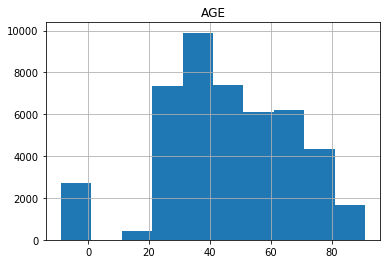

In [60]:
col_list = ['AGE']
hist = df.hist(column=col_list, bins=10)
df.loc[df['AGE']<0, 'AGE'].count()

AGE1 has several negative values. The positive values look distributed as a Gaussian. Viewing the distribution below of the negative values

-9    2706
Name: AGE, dtype: int64

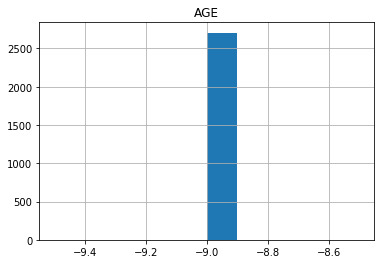

In [63]:
df_neg = df.loc[df['AGE'] < 0]
col_list = ['AGE']
hist = df_neg.hist(column=col_list, bins=10)
df_neg['AGE'].value_counts()

The negatives fall under one bin. Likely the age was not availabe for these records. Therefore setting them to NaN below.

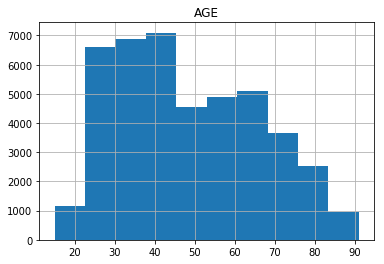

In [64]:
df.loc[df['AGE'] == -9, 'AGE'] = np.NaN
col_list = ['AGE']
hist = df.hist(column=col_list, bins=10)

In [65]:
df['Assisted'].value_counts()

0    44005
1     2137
Name: Assisted, dtype: int64

In [66]:
df['FMTAssisted'].value_counts()

'0 Not Assisted'    44005
'1 Assisted'         2137
Name: FMTAssisted, dtype: int64

In [67]:
df['BEDRMS'].value_counts()

 3     18372
 2     14630
 1      5815
 4      5422
 5       974
 0       688
 6       179
 7        31
 10       15
 8        13
-9         3
Name: BEDRMS, dtype: int64

In [69]:
df.loc[df['BEDRMS']==-9, 'BEDRMS'] = 'not_defined'
df['BEDRMS'].value_counts()

3              18372
2              14630
1               5815
4               5422
5                974
0                688
6                179
7                 31
10                15
8                 13
not_defined        3
Name: BEDRMS, dtype: int64

In [70]:
df['BUILT'].value_counts()

4     7667
5     6424
3     5506
9     5174
2     4129
6     3970
7     3158
8     2708
1     1901
85     946
84     822
86     796
83     708
80     660
81     601
87     519
82     453
Name: BUILT, dtype: int64

In [72]:
df['FMTBuilt'].value_counts()

'1960-1979'    19203
'-5'           11040
'1940-1959'    10394
'1980-1989'     5505
Name: FMTBuilt, dtype: int64

In [73]:
df.loc[df['FMTBuilt'].str.contains('-5'), 'FMTBuilt'] = 'not_defined'
df['FMTBuilt'].value_counts()

'1960-1979'    19203
not_defined    11040
'1940-1959'    10394
'1980-1989'     5505
Name: FMTBuilt, dtype: int64

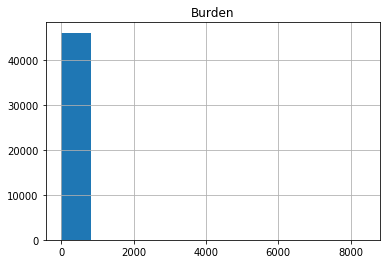

In [77]:
hist = df.hist(column='Burden', bins=10)

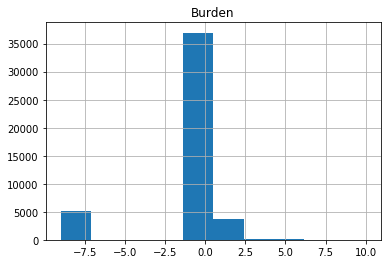

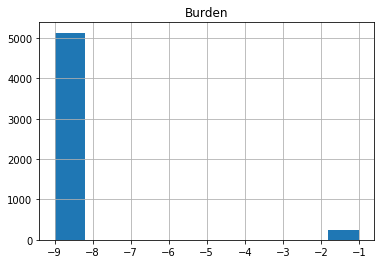

In [78]:
hist = df.loc[df['Burden'] < 10].hist(column='Burden',bins=10)
hist = df.loc[df['Burden'] < 0 ].hist(column='Burden',bins=10)


In [79]:
print(df.loc[df['Burden'] == -9, 'Burden'].count())
print(df.loc[df['Burden'] == -1, 'Burden'].count())

5131
237


BURDEN is a continuous variable. Setting the 5131 values of -9 to NaN as these seem to be unavailable. Will assume that BURDEN set to -1 are households with no income (the ratio of cost to income would be infinite). There are also households with BURDEN higher than 1. Therefore if BURDEN is -1 or is 10 or more, the BURDEN is to be set at 10.

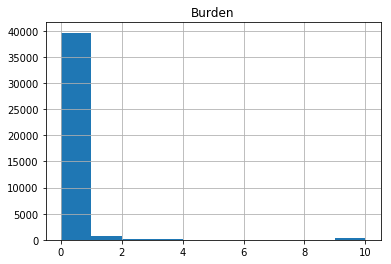

In [80]:
df.loc[df['Burden'] == -9, 'Burden'] = np.NaN
df.loc[df['Burden'] == -1, 'Burden'] = 10
df.loc[df['Burden']  > 10, 'Burden'] = 10
hist = df.hist(column = 'Burden', bins = 10)

0
0


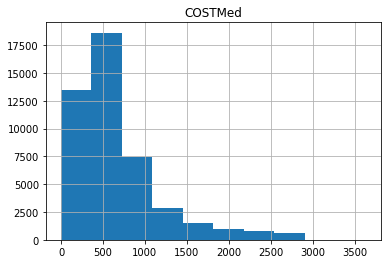

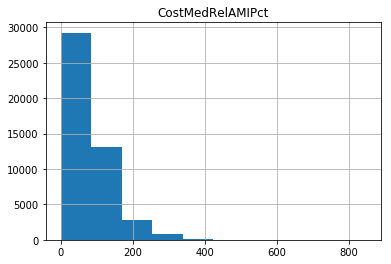

In [81]:
hist = df.hist(column='COSTMed',bins=10)
print(df.loc[df['COSTMed'] < 0,'COSTMed'].count())

hist = df.hist(column='CostMedRelAMIPct',bins=10)
print(df.loc[df['CostMedRelAMIPct'] < 0,'CostMedRelAMIPct'].count())


In [82]:
print(df['CostMedRelAMICat'].value_counts())
print(df['FMTCOSTMEDRELAMICAT'].value_counts())

4    9118
7    8170
2    7833
5    6793
3    5182
1    5126
6    3920
Name: CostMedRelAMICat, dtype: int64
'4 60 - 80% AMI'      9118
'7 120% AMI +'        8170
'2 30 - 50% AMI'      7833
'5 80 - 100% AMI'     6793
'3 50 - 60% AMI'      5182
'1 LTE 30% AMI'       5126
'6 100 - 120% AMI'    3920
Name: FMTCOSTMEDRELAMICAT, dtype: int64


0


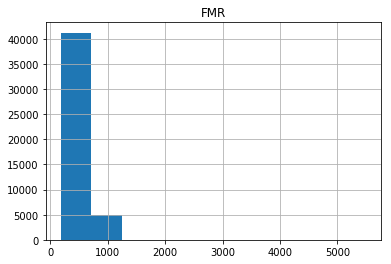

In [83]:
hist = df.hist(column='FMR', bins=10)
print(df.loc[df['FMR'] < 0,'FMR'].count())

In [84]:
df['FMTAssisted'].value_counts()

'0 Not Assisted'    44005
'1 Assisted'         2137
Name: FMTAssisted, dtype: int64

In [85]:
df['FMTMetro'].value_counts()

'-5'              32334
'Central City'    13808
Name: FMTMetro, dtype: int64

Most values have -5 value which is not defined in documentation. Dropping this column.

In [86]:
df['FMTOwnRent'].value_counts()

'1 Owner'     29693
'2 Renter'    16449
Name: FMTOwnRent, dtype: int64

In [87]:
df['FMTRegion'].value_counts()

'-5'      37153
'West'     8989
Name: FMTRegion, dtype: int64

Most values have -5 value which is not defined in documentation. Dropping this column.

In [88]:
df['FMTStatus'].value_counts()

'1 Occupied'    43436
'3 Vacant'       2706
Name: FMTStatus, dtype: int64

In [90]:
df['FMTStructureType'].value_counts()

'1 Single Family'    31403
'2 2-4 units'         4668
'3 5-19 units'        4224
'6 Mobile Home'       2900
'5 50+ units'         1531
'4 20-49 units'       1416
Name: FMTStructureType, dtype: int64

In [91]:
print(df['IncRelAMICat'].value_counts())
print(df['FMTIncRelAMICat'].value_counts())

 7    15664
 1     5543
 2     5333
 5     5050
 4     4930
 6     4273
-9     2706
 3     2643
Name: IncRelAMICat, dtype: int64
'7 120% AMI +'        15664
'1 LTE 30% AMI'        5543
'2 30 - 50% AMI'       5333
'5 80 - 100% AMI'      5050
'4 60 - 80% AMI'       4930
'6 100 - 120% AMI'     4273
'.'                    2706
'3 50 - 60% AMI'       2643
Name: FMTIncRelAMICat, dtype: int64


Will use FMTIncRelAMICat, dropping IncRelAMICat

In [92]:
df.loc[df['FMTIncRelAMICat'].str.contains('.', regex=False), 'FMTIncRelAMICat'] = '\'not_defined\''
print(df['FMTIncRelAMICat'].value_counts())

'7 120% AMI +'        15664
'1 LTE 30% AMI'        5543
'2 30 - 50% AMI'       5333
'5 80 - 100% AMI'      5050
'4 60 - 80% AMI'       4930
'6 100 - 120% AMI'     4273
'not_defined'          2706
'3 50 - 60% AMI'       2643
Name: FMTIncRelAMICat, dtype: int64


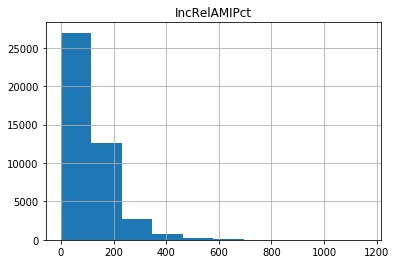

In [97]:
hist = df.hist(column='IncRelAMIPct', bins=10)

In [100]:
df.loc[df['IncRelAMIPct'] < 0, 'IncRelAMIPct'].count()

0

0

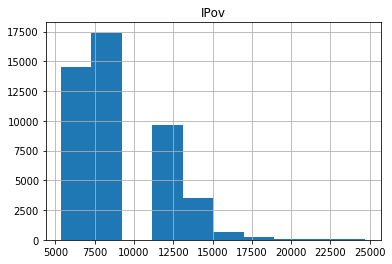

In [101]:
col_list = ['IPov']
hist = df.hist(column=col_list, bins=10)
df.loc[df['IPov'] < 0, 'IPov'].count()

0

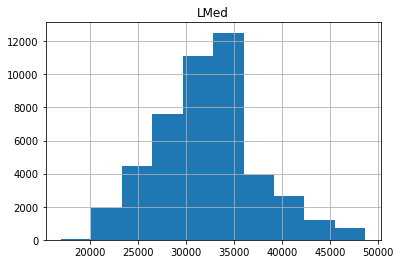

In [102]:
hist = df.hist(column = 'LMed', bins = 10)
df.loc[df['LMed'] < 0, 'LMed'].count()

In [103]:
columns = ['NUNITS']
for column in columns:
    print(df[column].value_counts())

1     34284
2      2547
4      1376
58     1365
8       999
3       764
6       703
12      670
16      456
10      300
5       248
24      217
20      192
7       164
9       144
18      126
11      125
14      106
30       88
36       87
40       78
15       73
48       65
22       57
28       50
32       49
13       48
42       42
17       39
25       39
39       37
26       36
50       35
23       32
21       31
34       31
54       31
56       29
44       28
35       26
33       26
38       25
19       23
27       23
37       21
31       19
52       19
29       19
46       19
45       18
41       17
55       17
47       16
43       14
49       14
53       13
57       10
51        9
97        2
62        1
Name: NUNITS, dtype: int64


In [104]:
# setting new categories for NUNITS
for index, row in df.iterrows():
    if   row['NUNITS'] > 100:
        df.loc[index, 'NUNITS'] = 'gt 100'
    elif row['NUNITS'] > 10:
        df.loc[index, 'NUNITS'] = 'gt 10'
    elif row['NUNITS'] > 1:
        df.loc[index, 'NUNITS'] = 'gt 1'
    elif row['NUNITS'] == -7:
        df.loc[index, 'NUNITS'] = 'not defined'
        


In [105]:
df['NUNITS'].value_counts()

1        34284
gt 1      7245
gt 10     4613
Name: NUNITS, dtype: int64

0

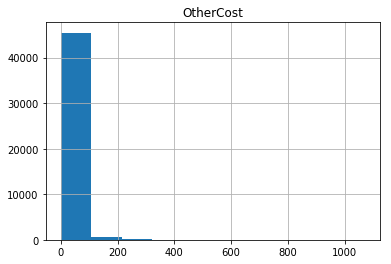

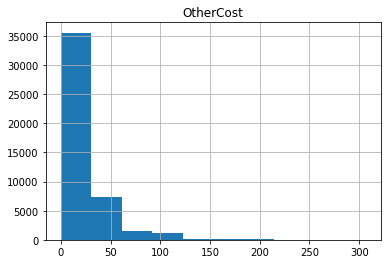

In [106]:
hist = df.hist(column='OtherCost',bins=10)
hist = df.loc[df['OtherCost'] < 500].hist(column='OtherCost',bins=10)
df.loc[df['OtherCost'] < 0, 'OtherCost'].count()

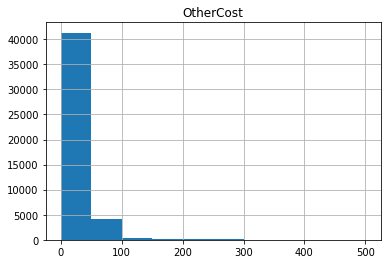

In [107]:
df.loc[df['OtherCost'] > 500, 'OtherCost'] = 500
hist = df.hist(column='OtherCost', bins=10)

In [108]:
df['OwnRent'].value_counts()

1    29693
2    16449
Name: OwnRent, dtype: int64

In [109]:
df['PER'].value_counts()

 2     14100
 1     10088
 3      7708
 4      6917
 5      3032
-9      2706
 6       983
 7       352
 8       150
 9        55
 10       26
 11       13
 12        9
 13        2
 14        1
Name: PER, dtype: int64

If number of persons per unit is greater than 8, setting value to '9 or more'. If PER is negative, setting to not_defined

In [110]:
df.loc[df['PER'] > 8, 'PER'] = '9 or more'
df.loc[df['PER'] == -9, 'PER'] = 'not_defined'
df['PER'].value_counts()

2              14100
1              10088
3               7708
4               6917
5               3032
not_defined     2706
6                983
7                352
8                150
9 or more        106
Name: PER, dtype: int64

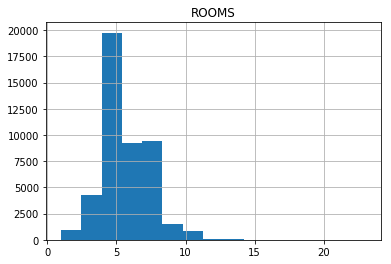

In [111]:
df['ROOMS'].value_counts()
hist = df.hist(column='ROOMS', bins=15)

In [112]:
df['TENURE'].value_counts()

 1    28857
 2    13505
-9     2706
 3     1074
Name: TENURE, dtype: int64

In [113]:
df.loc[df['TENURE'] == -9, 'TENURE'] = 'not_defined'
df['TENURE'].value_counts()

1              28857
2              13505
not_defined     2706
3               1074
Name: TENURE, dtype: int64

-9    2706
Name: TotSal, dtype: int64

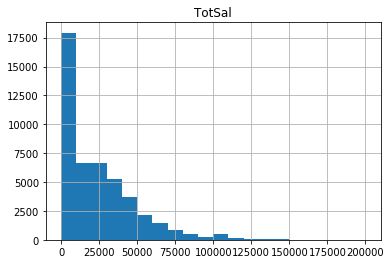

In [114]:
hist = df.hist(column='TotSal', bins=20)
df.loc[df['TotSal'] < 0, 'TotSal'].value_counts()

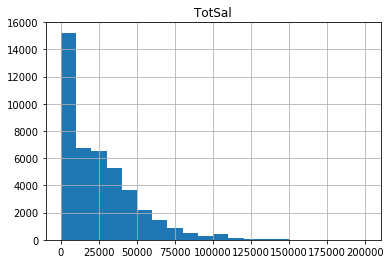

In [115]:
df.loc[df['TotSal'] == -9, 'TotSal'] = np.NaN
hist = df.hist(column='TotSal', bins=20)

0

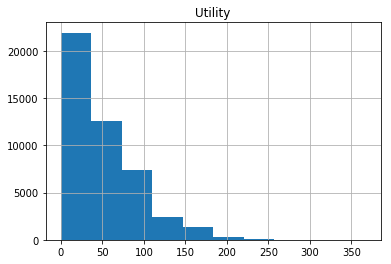

In [116]:
hist = df.hist(column='Utility', bins=10)
(df['Utility'] < 0).sum()

In [117]:
df['VACANCY'].value_counts()

-9    43436
 1     1524
 3      596
 5      240
 2      185
 4      161
Name: VACANCY, dtype: int64

VACANCY has most values set at -9. Not sure what the other values mean. There is no explanation in documentation. Dropping this variable.

-9    16449
Name: VALUE, dtype: int64

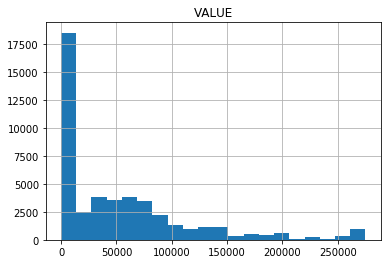

In [118]:
hist = df.hist(column='VALUE', bins=20)
df.loc[df['VALUE'] < 0, 'VALUE'].value_counts()

Setting value of -9 to NaN

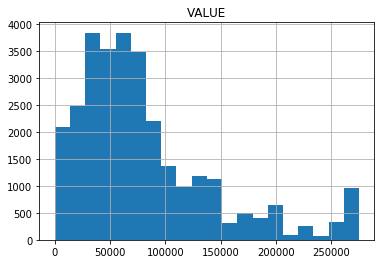

In [119]:
df.loc[df['VALUE'] == -9, 'VALUE'] = np.NaN
hist = df.hist(column='VALUE', bins=20)

-9        2706
-10001      12
-4001        3
-10000       2
-6000        2
-5001        2
-4000        2
-2001        1
-2200        1
-800         1
-1100        1
-7501        1
-1380        1
-2000        1
-593         1
-8501        1
-753         1
-9001        1
-1001        1
-3120        1
-3500        1
-7800        1
-1737        1
-7900        1
-2           1
Name: ZINC2, dtype: int64

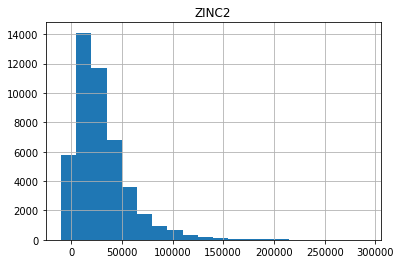

In [120]:
hist = df.hist(column='ZINC2', bins=20)
df.loc[df['ZINC2'] < 0, 'ZINC2'].value_counts()

Values of -9 setting to NaN. Other negative values setting to 0 as these likely represent households in financial distress

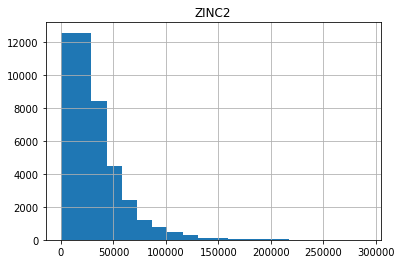

In [121]:
df.loc[df['ZINC2'] == -9, 'ZINC2' ] = np.NaN
df.loc[df['ZINC2'] < 0, 'ZINC2' ] = 0
hist = df.hist(column='ZINC2', bins=20)

-9    3447
Name: ZSMHC, dtype: int64

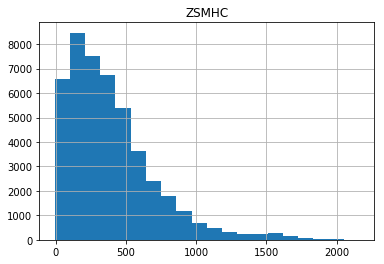

In [122]:
hist = df.hist(column='ZSMHC', bins=20)
df.loc[df['ZSMHC'] < 0, 'ZSMHC'].value_counts()

Values of -9 setting to NaN.

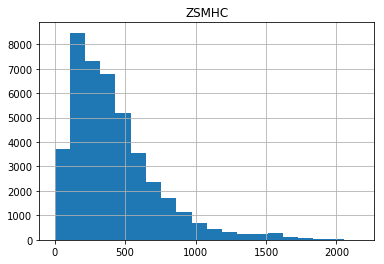

In [123]:
df.loc[df['ZSMHC'] == -9, 'ZSMHC' ] = np.NaN
hist = df.hist(column='ZSMHC', bins=20)